# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance_claims.csv", sep=';')

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable policy_annual_premium  umbrella_limit  \
0    250/500               1000               1406,91               0   
1    250/500               2000               1197,22         5000000   
2    100/300               2000               1413,14         5000000   
3    250/500               2000               1415,74         6000000   
4   500/1000               1000               1583,91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported Count Blank  
0              Y           0  
1              Y           0  
2              N           0  
3              Y           0  
4              N           0  

[5 rows x 40 columns]

### Missing Values

In [4]:
null_counts = df.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [5]:
df_new = df.drop("fraud_reported", axis = 1)

In [6]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable policy_annual_premium  umbrella_limit  \
0    250/500               1000               1406,91               0   
1    250/500               2000               1197,22         5000000   
2    100/300               2000               1413,14         5000000   
3    250/500               2000               1415,74         6000000   
4   500/1000               1000               1583,91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  Count Blank  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 39 columns]

### Binding Numeric Data

In [7]:
df_new.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.961000  546238.648000        1134.000000   
std            115.113174     9.126378  257063.005276         610.669237   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       umbrella_limit    insured_zip  capital-gains   capital-loss  \
count    1.000000e+03    1000.000000    1000.000000    1000.000000   
mean     1.101000e+06  501214.488000   25176.452000  -26793.700000   
std      2.297407e+06   71701.610941   27849.459762   28104.096686   
min     -1.000000e+06  430104.000000       0.000000 -111100.000000   
25%      0.000000e+00  448404.500000       0.000000  -51500.000000   
50%      0.000000e+00  466445.500000       0.000000  -23250.000000   
75%      0.000000e+00  603251.000000   51025.000000       0.000000   
max      1.000000e+07  620962.000000  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000         1000.000000    1000.00000      1000.00000   
mean      1.487000        52768.716000    7434.94500      7398.62900   
std       1.111335        26352.455313    4880.71363      4824.63434   
min       0.000000          100.000000       0.00000         0.00000   
25%       1.000000        41962.500000    4295.00000      4445.00000   
50%       1.000000        57880.000000    6780.00000      6750.00000   
75%       2.000000        70532.500000   11305.00000     10885.00000   
max       3.000000       114920.000000   21450.00000     23670.00000   

       vehicle_claim    auto_year  Count Blank  
count    1000.000000  1000.000000       1000.0  
mean    37928.950000  2005.103000          0.0  
std     18886.252893     6.015861          0.0  
min        70.000000  1995.000000          0.0  
25%     30292.500000  2000.000000          0.0  
50%     42100.000000  2005.000000          0.0  
75%     50822.500000  2010.000000          0.0  
max     79560.000000  2015.000000          0.0

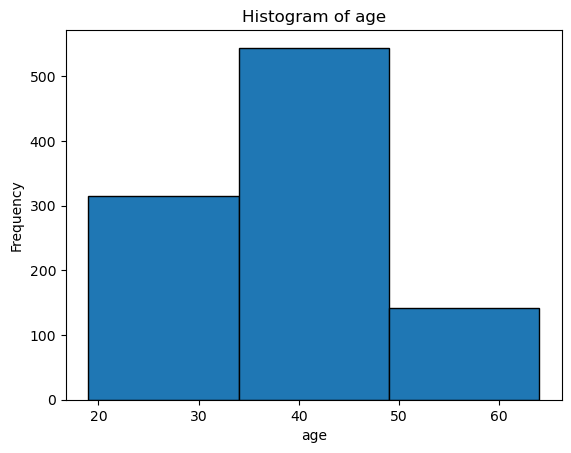

In [8]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [9]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [10]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable policy_annual_premium  umbrella_limit  \
0    250/500               1000               1406,91               0   
1    250/500               2000               1197,22         5000000   
2    100/300               2000               1413,14         5000000   
3    250/500               2000               1415,74         6000000   
4   500/1000               1000               1583,91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year Count Blank  \
0          13020         52080       Saab         92x      2004           0   
1            780          3510   Mercedes        E400      2007           0   
2           3850         23100      Dodge         RAM      2007           0   
3           6340         50720  Chevrolet       Tahoe      2014           0   
4            650          4550     Accura         RSX      2009           0   

  ages_category  
0   Middle Aged  
1   Middle Aged  
2   Young Adult  
3   Middle Aged  
4   Middle Aged  

[5 rows x 40 columns]

In [11]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['customer_category'] = pd.cut(df_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [12]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable policy_annual_premium  umbrella_limit  \
0    250/500               1000               1406,91               0   
1    250/500               2000               1197,22         5000000   
2    100/300               2000               1413,14         5000000   
3    250/500               2000               1415,74         6000000   
4   500/1000               1000               1583,91         6000000   

   insured_zip  ... total_claim_amount injury_claim property_claim  \
0       466132  ...              71610         6510          13020   
1       468176  ...               5070          780            780   
2       430632  ...              34650         7700           3850   
3       608117  ...              63400         6340           6340   
4       610706  ...               6500         1300            650   

  vehicle_claim  auto_make  auto_model  auto_year Count Blank ages_category  \
0         52080       Saab         92x       2004           0   Middle Aged   
1          3510   Mercedes        E400       2007           0   Middle Aged   
2         23100      Dodge         RAM       2007           0   Young Adult   
3         50720  Chevrolet       Tahoe       2014           0   Middle Aged   
4          4550     Accura         RSX       2009           0   Middle Aged   

    customer_category  
0    Long-Term Client  
1    Long-Term Client  
2  Established Client  
3    Long-Term Client  
4    Long-Term Client  

[5 rows x 41 columns]

## Creating New Features

In [13]:
df_new["Contract Years"] = (df_new["months_as_customer"] / 12).round().astype(int)

In [14]:
print (df_new.dtypes)

months_as_customer                int64
age                               int64
policy_number                     int64
policy_bind_date                 object
policy_state                     object
policy_csl                       object
policy_deductable                 int64
policy_annual_premium            object
umbrella_limit                    int64
insured_zip                       int64
insured_sex                      object
insured_education_level          object
insured_occupation               object
insured_hobbies                  object
insured_relationship             object
capital-gains                     int64
capital-loss                      int64
incident_date                    object
incident_type                    object
collision_type                   object
incident_severity                object
authorities_contacted            object
incident_state                   object
incident_city                    object
incident_location                object


In [15]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable policy_annual_premium  umbrella_limit  \
0    250/500               1000               1406,91               0   
1    250/500               2000               1197,22         5000000   
2    100/300               2000               1413,14         5000000   
3    250/500               2000               1415,74         6000000   
4   500/1000               1000               1583,91         6000000   

   insured_zip  ... injury_claim property_claim vehicle_claim  auto_make  \
0       466132  ...         6510          13020         52080       Saab   
1       468176  ...          780            780          3510   Mercedes   
2       430632  ...         7700           3850         23100      Dodge   
3       608117  ...         6340           6340         50720  Chevrolet   
4       610706  ...         1300            650          4550     Accura   

  auto_model  auto_year  Count Blank ages_category   customer_category  \
0        92x       2004            0   Middle Aged    Long-Term Client   
1       E400       2007            0   Middle Aged    Long-Term Client   
2        RAM       2007            0   Young Adult  Established Client   
3      Tahoe       2014            0   Middle Aged    Long-Term Client   
4        RSX       2009            0   Middle Aged    Long-Term Client   

  Contract Years  
0             27  
1             19  
2             11  
3             21  
4             19  

[5 rows x 42 columns]

## Feature Joining

In [16]:
df_new['policy_annual_premium'] = df_new['policy_annual_premium'].astype(str).str.replace(',', '.').astype(float)

In [17]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [18]:
df_new['total_premiums_paid'] = df_new['total_premiums_paid'].round().astype(int)

In [19]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... property_claim vehicle_claim  auto_make auto_model  \
0       466132  ...          13020         52080       Saab        92x   
1       468176  ...            780          3510   Mercedes       E400   
2       430632  ...           3850         23100      Dodge        RAM   
3       608117  ...           6340         50720  Chevrolet      Tahoe   
4       610706  ...            650          4550     Accura        RSX   

  auto_year  Count Blank  ages_category   customer_category Contract Years  \
0      2004            0    Middle Aged    Long-Term Client             27   
1      2007            0    Middle Aged    Long-Term Client             19   
2      2007            0    Young Adult  Established Client             11   
3      2014            0    Middle Aged    Long-Term Client             21   
4      2009            0    Middle Aged    Long-Term Client             19   

  total_premiums_paid  
0               38456  
1               22747  
2               15780  
3               30202  
4               30094  

[5 rows x 43 columns]

In [23]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [24]:
df_new.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... vehicle_claim  auto_make auto_model auto_year Count Blank  \
0       466132  ...         52080       Saab        92x      2004           0   
1       468176  ...          3510   Mercedes       E400      2007           0   
2       430632  ...         23100      Dodge        RAM      2007           0   
3       608117  ...         50720  Chevrolet      Tahoe      2014           0   
4       610706  ...          4550     Accura        RSX      2009           0   

   ages_category   customer_category Contract Years total_premiums_paid  \
0    Middle Aged    Long-Term Client             27               38456   
1    Middle Aged    Long-Term Client             19               22747   
2    Young Adult  Established Client             11               15780   
3    Middle Aged    Long-Term Client             21               30202   
4    Middle Aged    Long-Term Client             19               30094   

  net_value_of_customer  
0                -33154  
1                 17677  
2                -18870  
3                -33198  
4                 23594  

[5 rows x 44 columns]

## Saving the csv for late

In [25]:
df_new.to_csv('Advanced Features Claims Data.csv')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations